# Wine Classification

In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt 
import seaborn as sns

style.use("seaborn")

%matplotlib inline

In [3]:
# load the training dataset
df = pd.read_csv('data/wine.csv')
df.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,1
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,0
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720,2
147,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625,2
152,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425,2
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,0
77,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500,1
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,0
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278,1
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,1


In [4]:
df.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


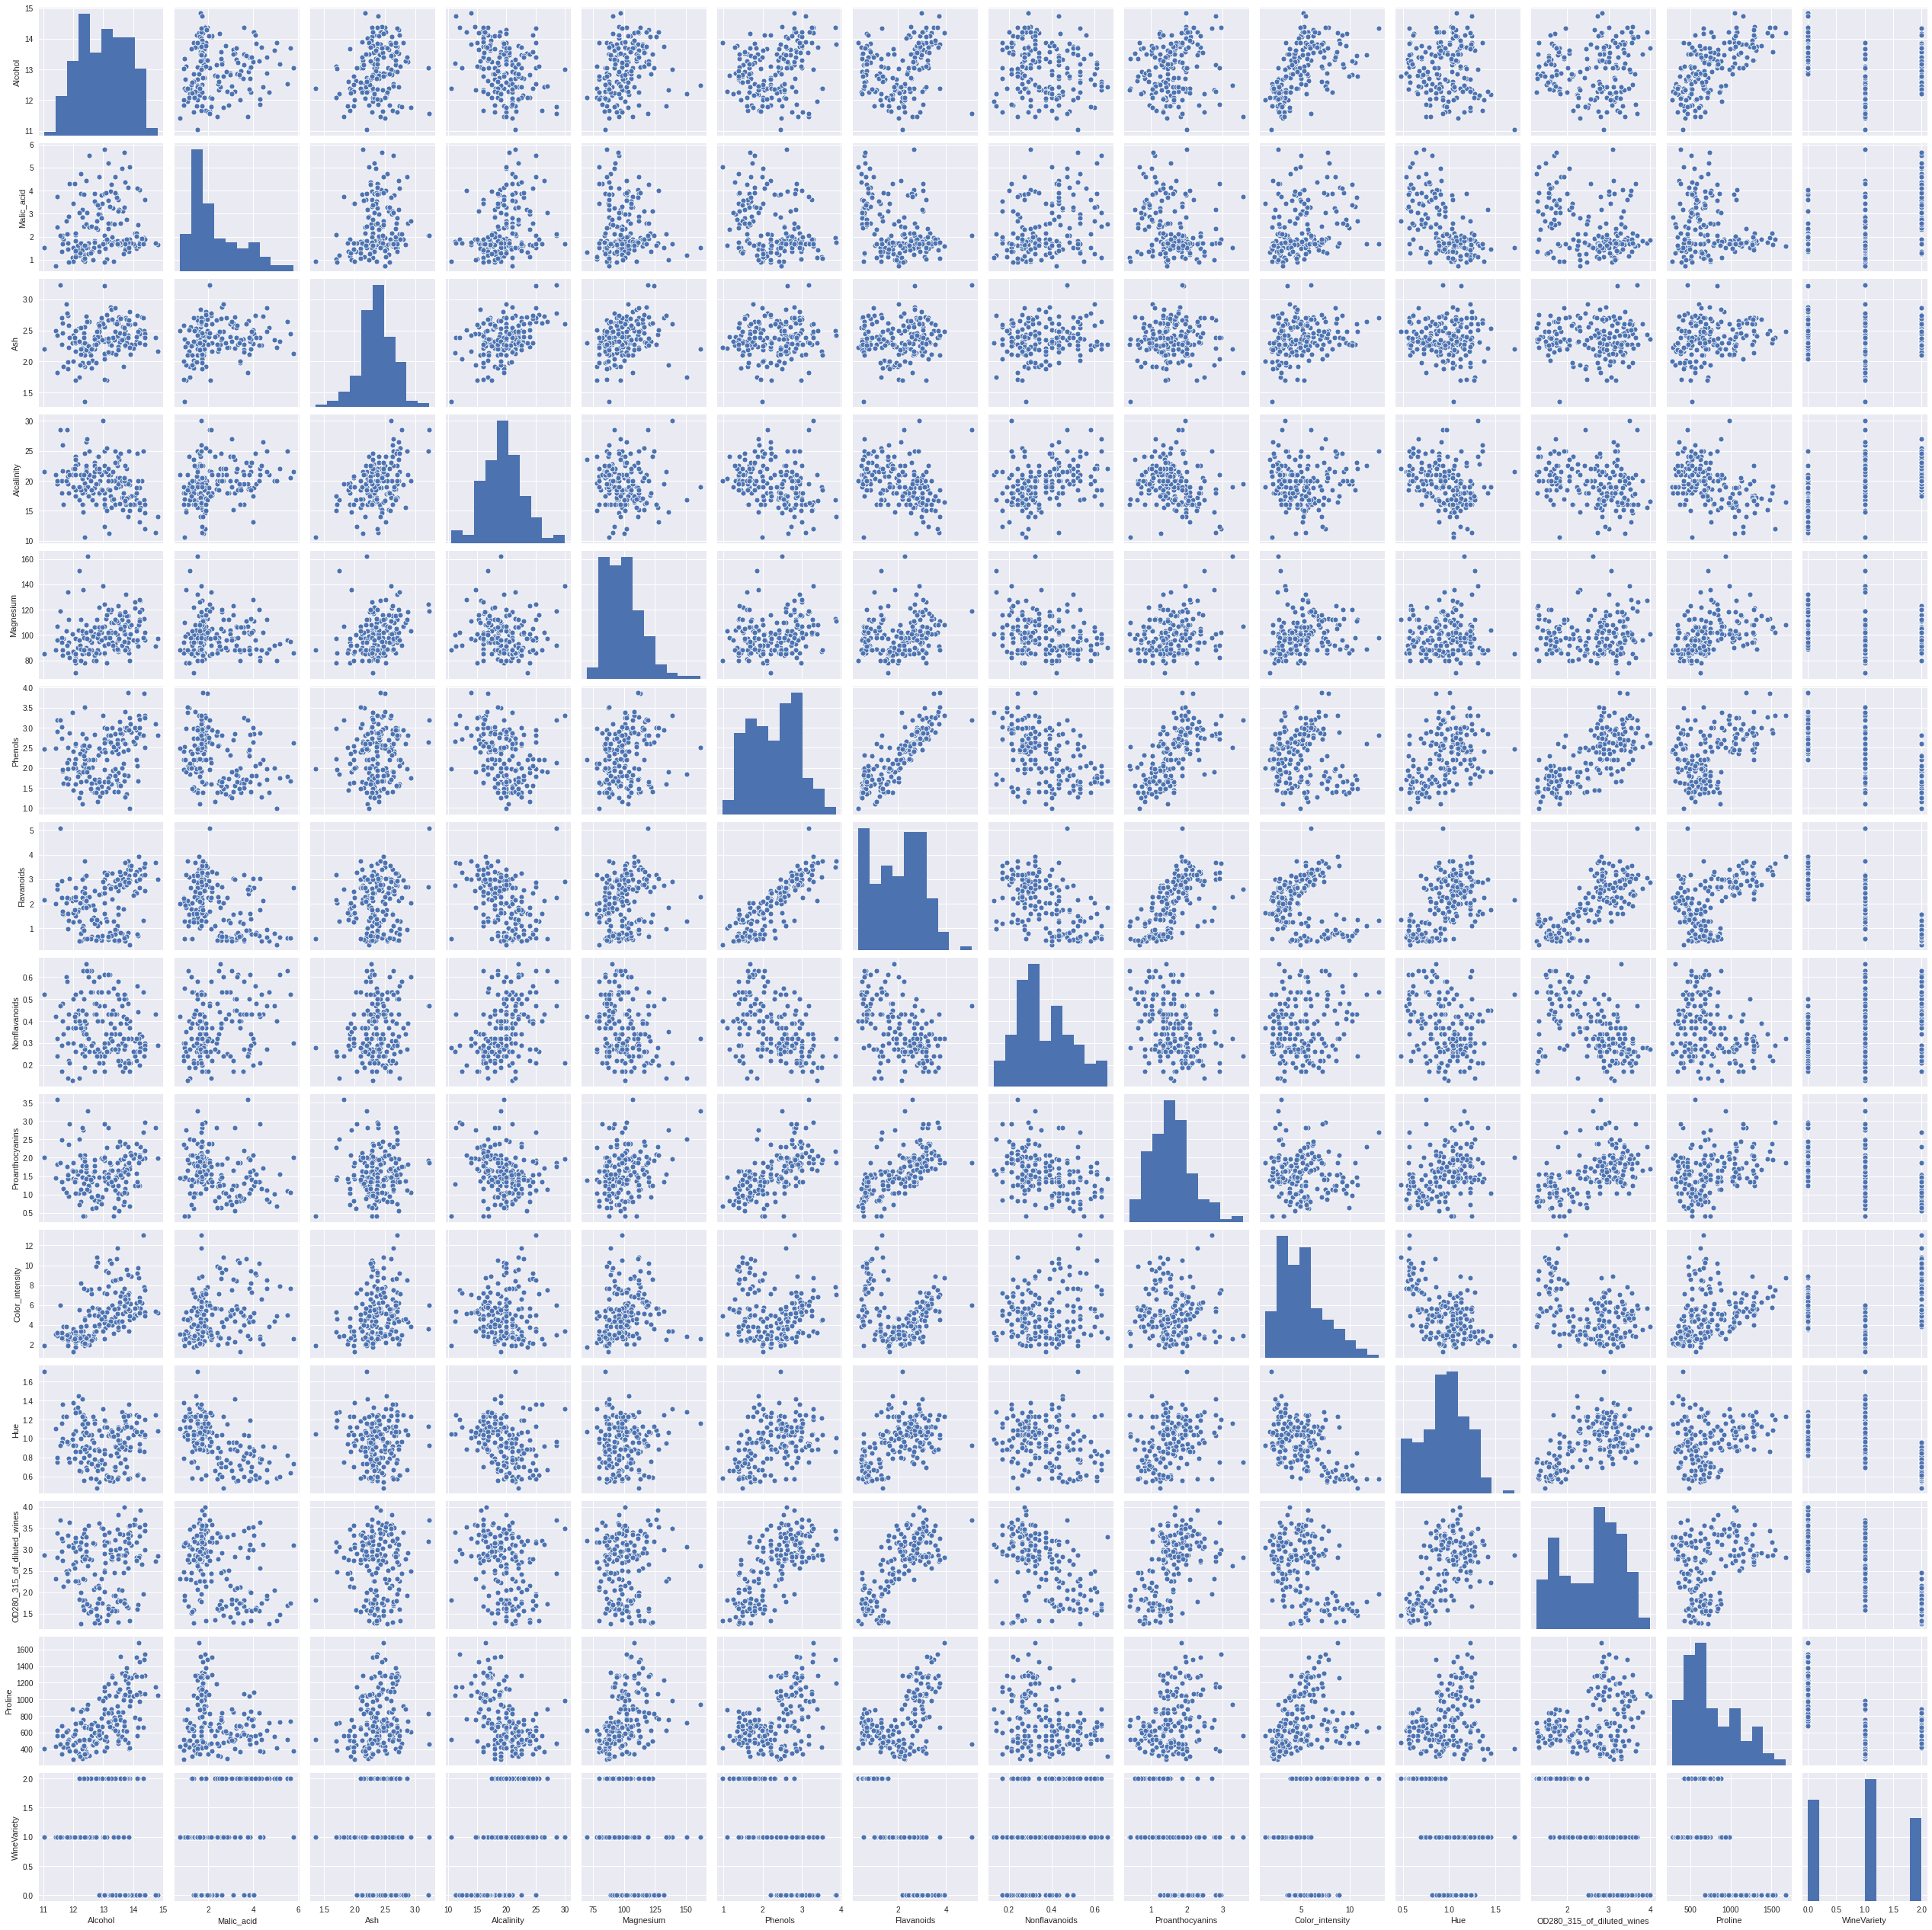

In [5]:
sns.pairplot(df)

In [6]:
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'

In [7]:
def plot_distribution(dataset):
    try:
        print("Field name :",dataset.name)
    except Exception as e:
        pass
    min_value = dataset.min()
    max_value = dataset.max()
    mean_value = dataset.mean()
    median_value = dataset.median()
    mode_value = dataset.mode()[0]
    
    print(f"""
    Minimum Value : {min_value} 
    Maximum Value : {max_value}
    Median        : {median_value}
    Mode Value    : {mode_value}
    Mean Value    : {mean_value}
    """)
    
    fig, ax = plt.subplots(3,1,figsize=(12,12))
    
    ax[0].hist(dataset.values)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)


    ax[1].boxplot(dataset,vert=False)
    ax[1].set_xlabel('Value')
    
    sns.distplot(dataset,kde=True,hist=True)
    ax[2].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)
    
    fig.suptitle(dataset.name)

    plt.show()

Field name : Alcohol

    Minimum Value : 11.03 
    Maximum Value : 14.83
    Median        : 13.05
    Mode Value    : 12.37
    Mean Value    : 13.000617977528083
    


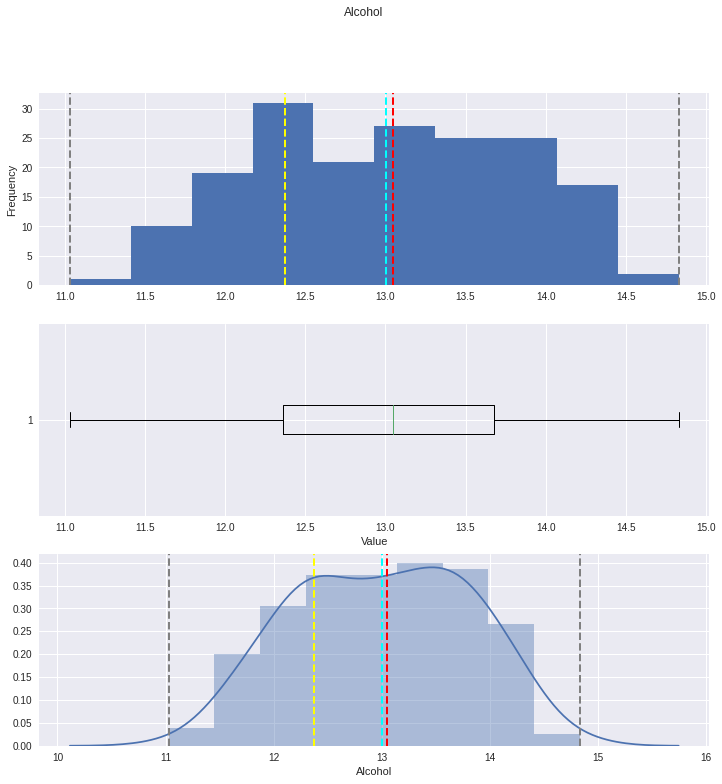

________________________________________________________________________________________________
Field name : Malic_acid

    Minimum Value : 0.74 
    Maximum Value : 5.8
    Median        : 1.8650000000000002
    Mode Value    : 1.73
    Mean Value    : 2.336348314606741
    


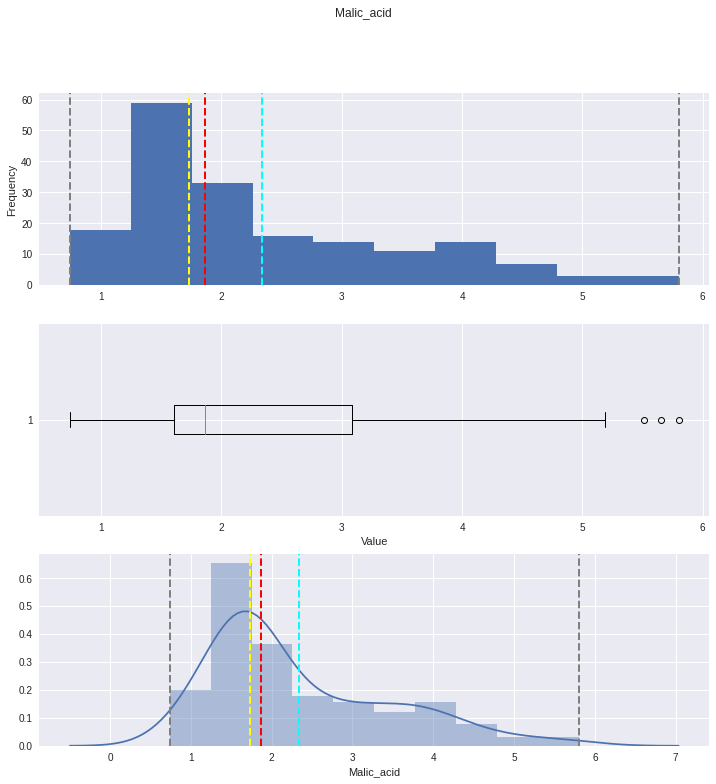

________________________________________________________________________________________________
Field name : Ash

    Minimum Value : 1.36 
    Maximum Value : 3.23
    Median        : 2.36
    Mode Value    : 2.28
    Mean Value    : 2.3665168539325854
    


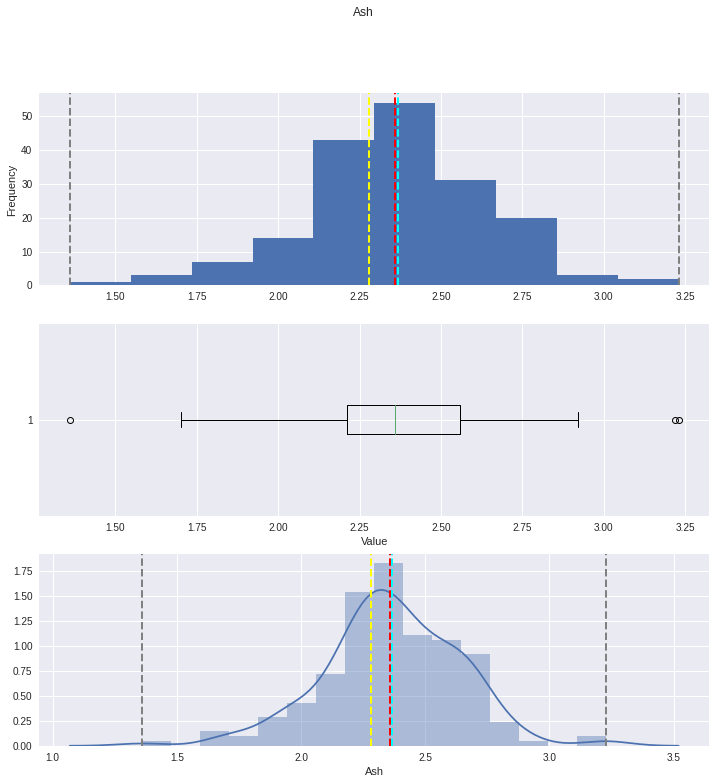

________________________________________________________________________________________________
Field name : Alcalinity

    Minimum Value : 10.6 
    Maximum Value : 30.0
    Median        : 19.5
    Mode Value    : 20.0
    Mean Value    : 19.49494382022472
    


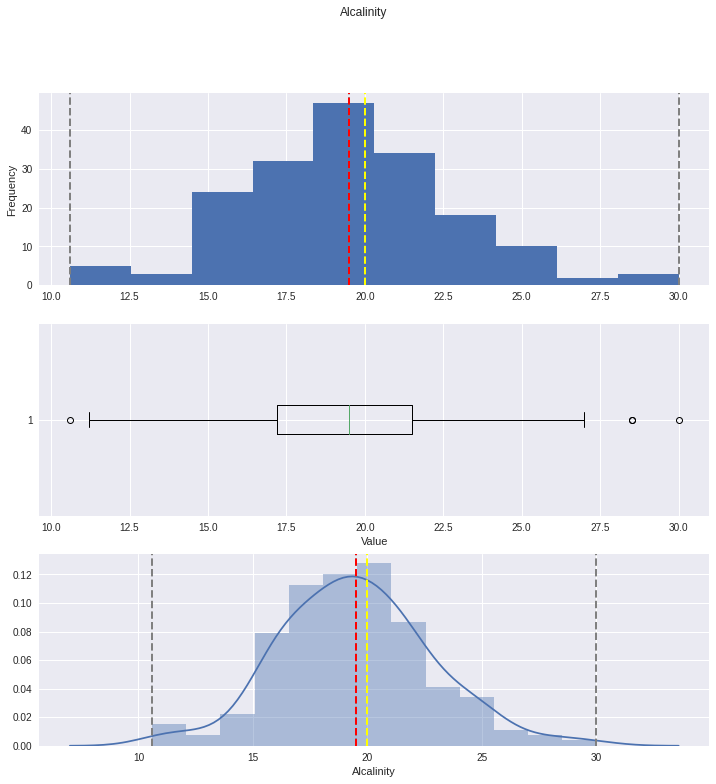

________________________________________________________________________________________________
Field name : Magnesium

    Minimum Value : 70 
    Maximum Value : 162
    Median        : 98.0
    Mode Value    : 88
    Mean Value    : 99.74157303370787
    


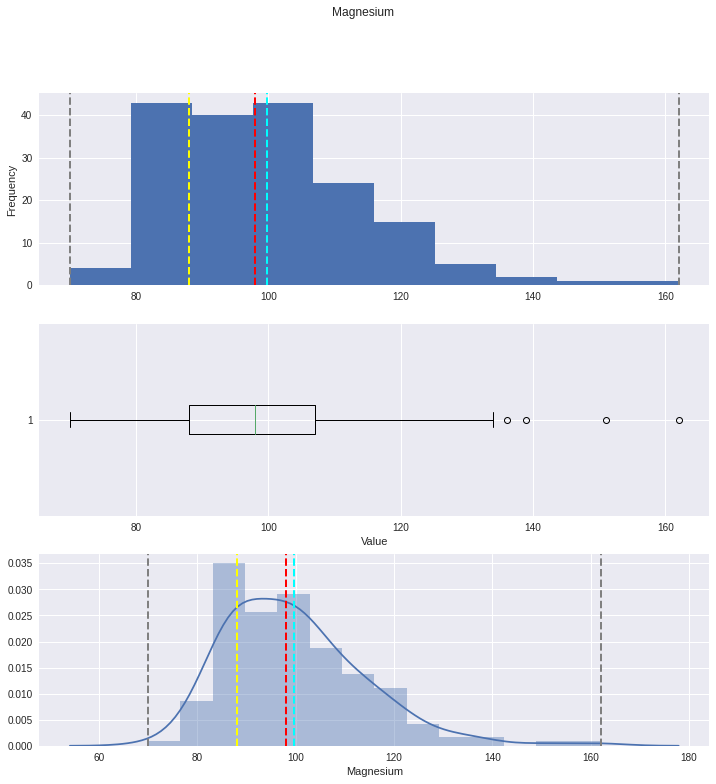

________________________________________________________________________________________________
Field name : Phenols

    Minimum Value : 0.98 
    Maximum Value : 3.88
    Median        : 2.355
    Mode Value    : 2.2
    Mean Value    : 2.295112359550562
    


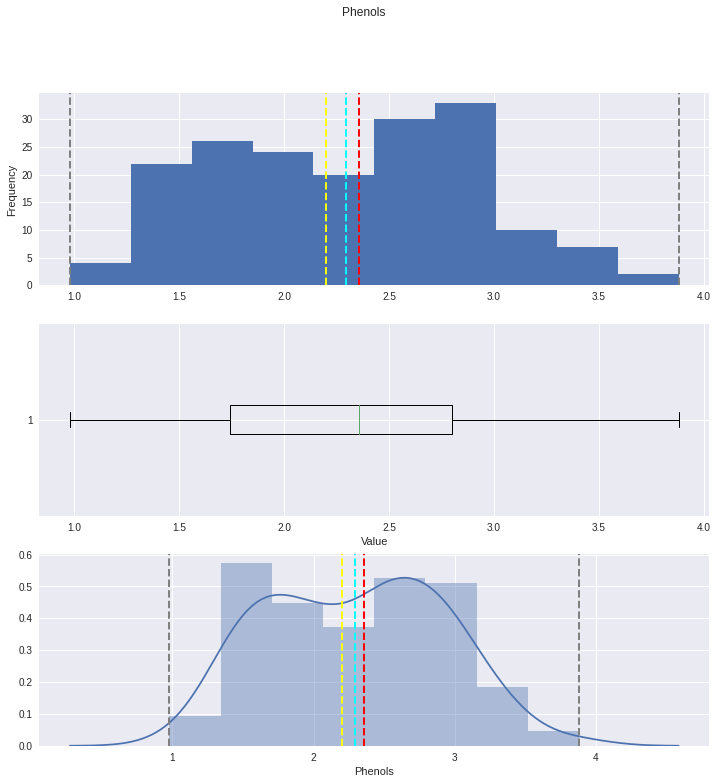

________________________________________________________________________________________________
Field name : Flavanoids

    Minimum Value : 0.34 
    Maximum Value : 5.08
    Median        : 2.135
    Mode Value    : 2.65
    Mean Value    : 2.0292696629213474
    


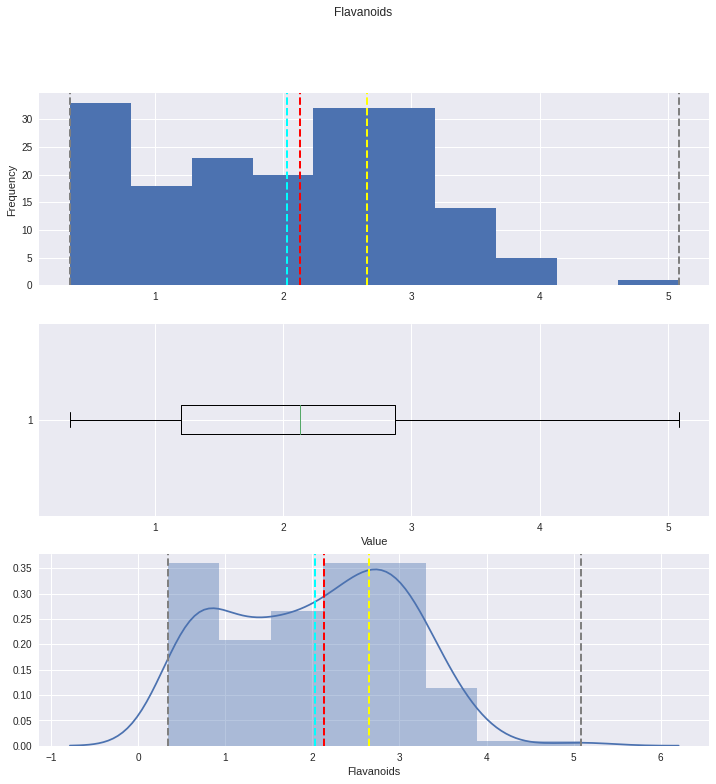

________________________________________________________________________________________________
Field name : Nonflavanoids

    Minimum Value : 0.13 
    Maximum Value : 0.66
    Median        : 0.34
    Mode Value    : 0.26
    Mean Value    : 0.36185393258426973
    


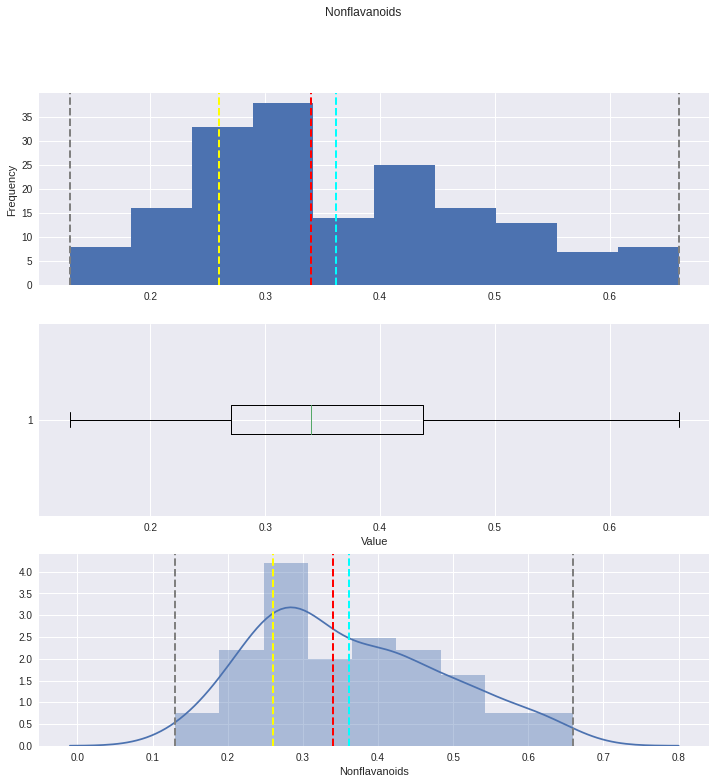

________________________________________________________________________________________________
Field name : Proanthocyanins

    Minimum Value : 0.41 
    Maximum Value : 3.58
    Median        : 1.5550000000000002
    Mode Value    : 1.35
    Mean Value    : 1.5908988764044953
    


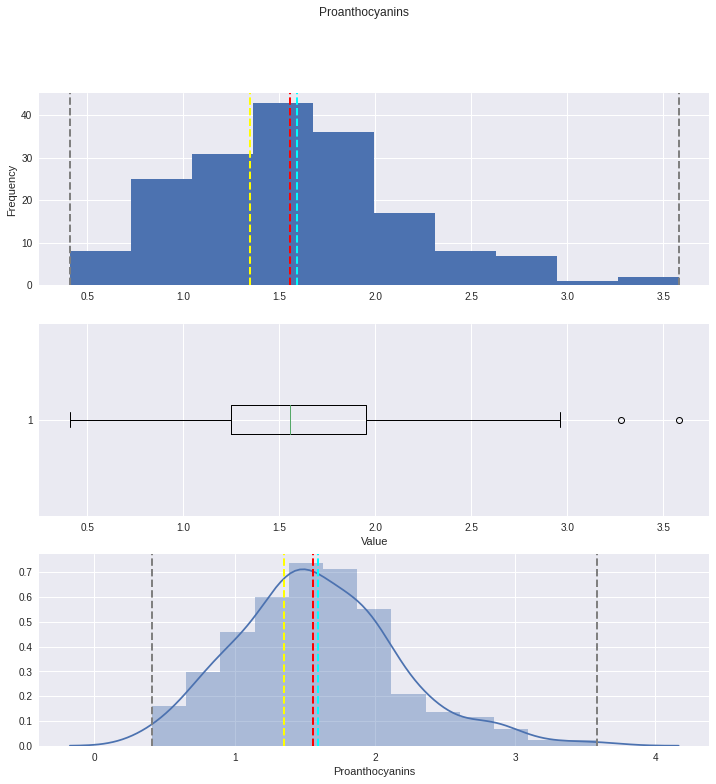

________________________________________________________________________________________________
Field name : Color_intensity

    Minimum Value : 1.28 
    Maximum Value : 13.0
    Median        : 4.6899999999999995
    Mode Value    : 2.6
    Mean Value    : 5.058089882022473
    


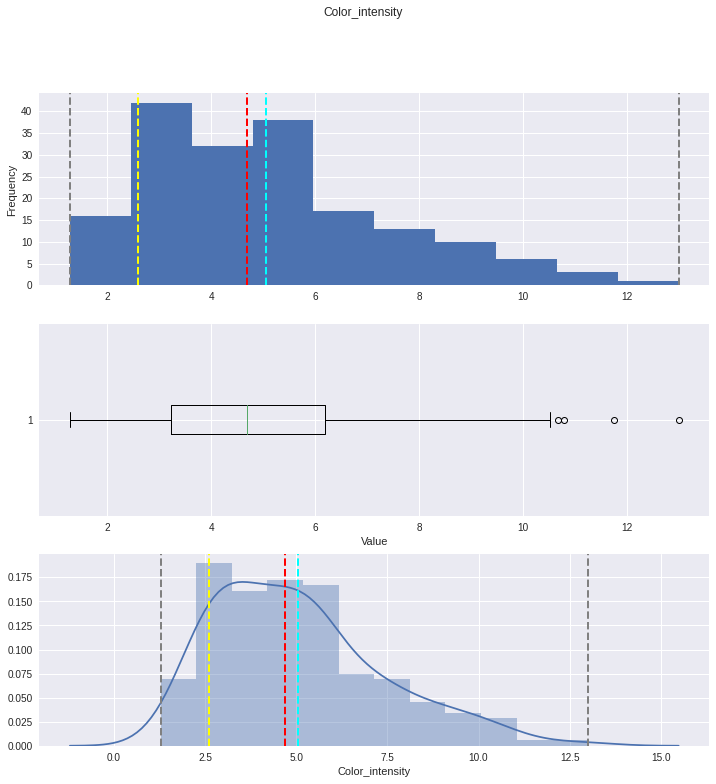

________________________________________________________________________________________________
Field name : Hue

    Minimum Value : 0.48 
    Maximum Value : 1.71
    Median        : 0.965
    Mode Value    : 1.04
    Mean Value    : 0.9574494382022468
    


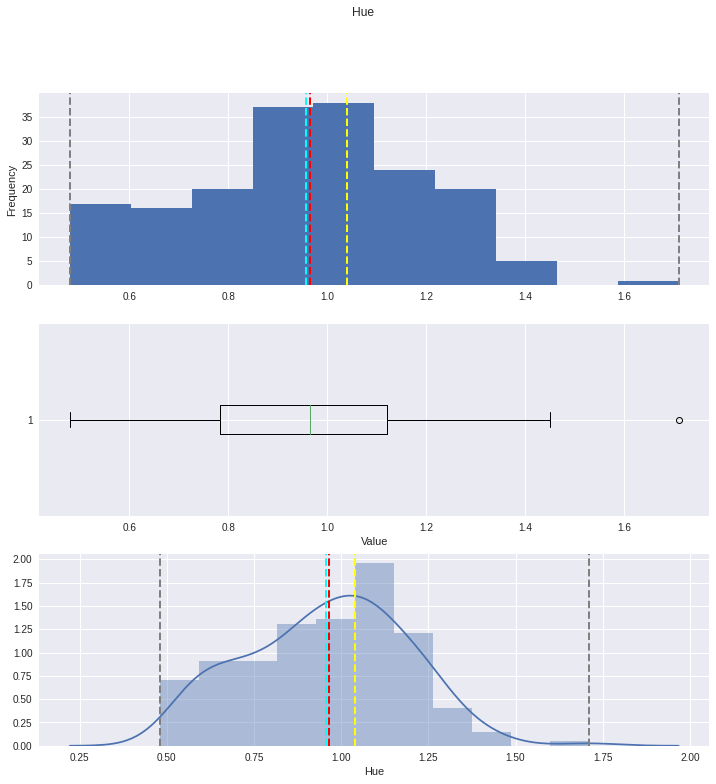

________________________________________________________________________________________________
Field name : OD280_315_of_diluted_wines

    Minimum Value : 1.27 
    Maximum Value : 4.0
    Median        : 2.78
    Mode Value    : 2.87
    Mean Value    : 2.6116853932584254
    


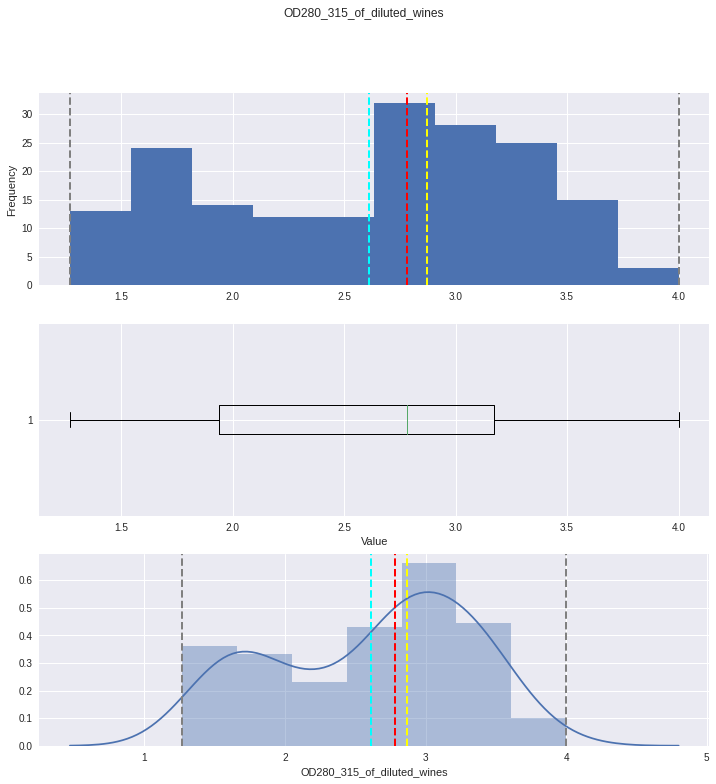

________________________________________________________________________________________________
Field name : Proline

    Minimum Value : 278 
    Maximum Value : 1680
    Median        : 673.5
    Mode Value    : 520
    Mean Value    : 746.8932584269663
    


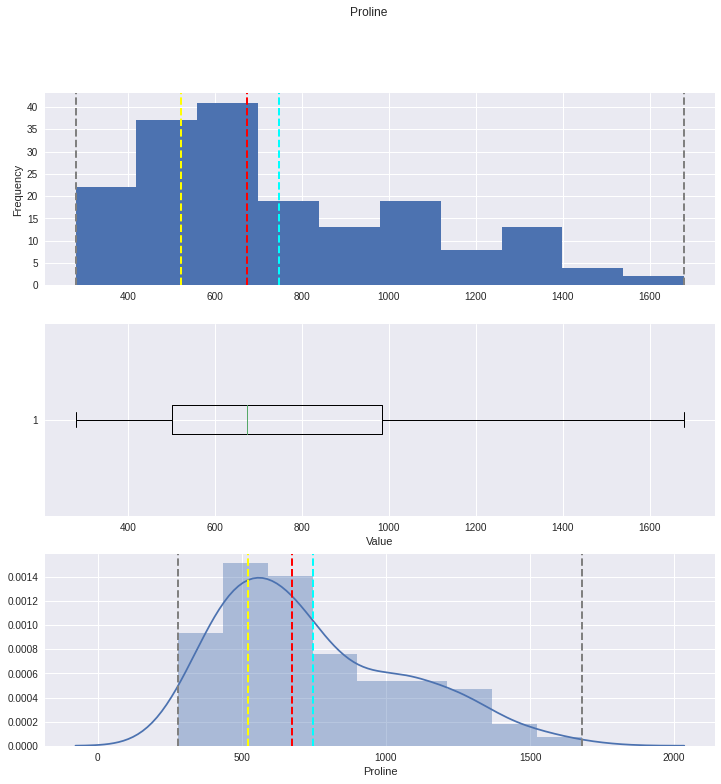

________________________________________________________________________________________________


In [8]:
for i in features:
    plot_distribution(df[i])
    print("________________________________________________________________________________________________")

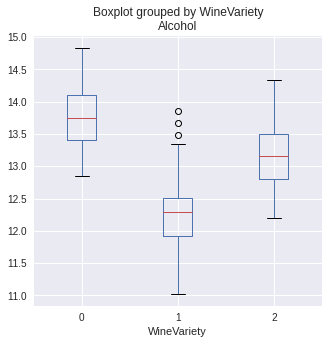

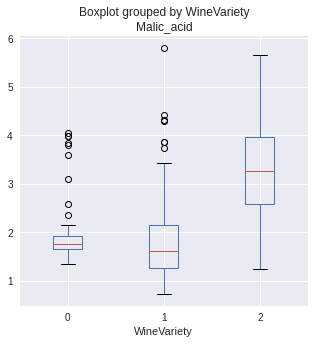

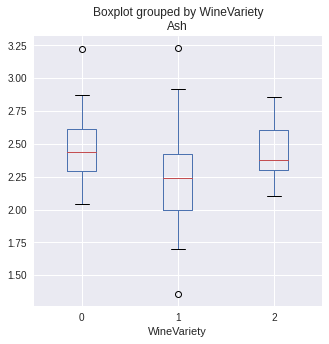

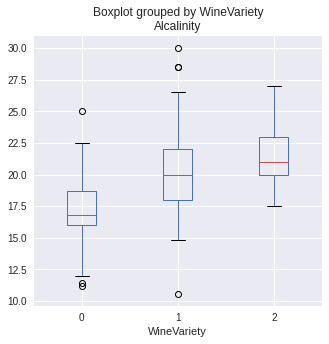

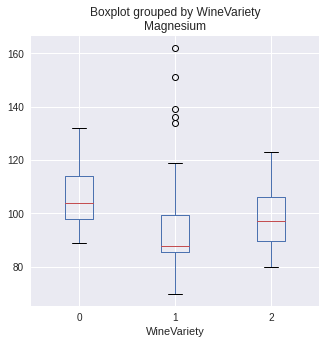

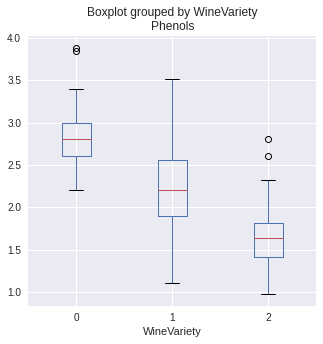

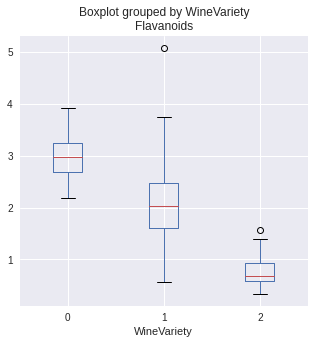

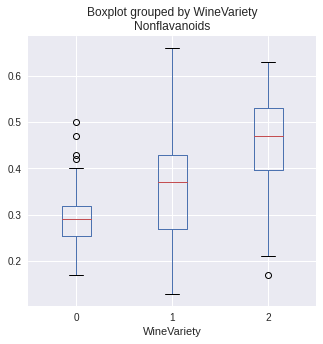

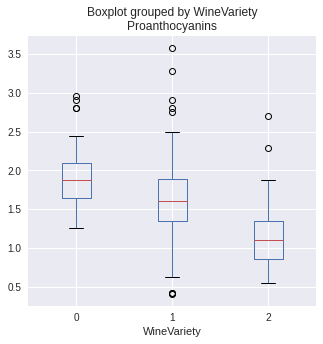

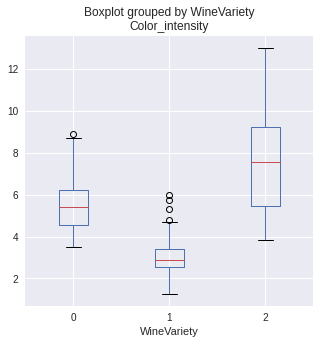

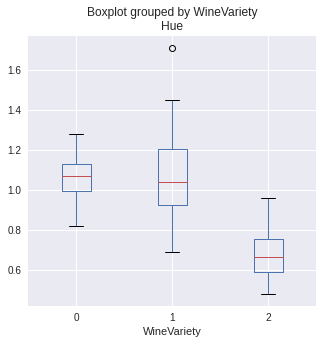

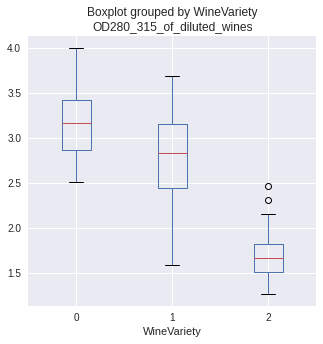

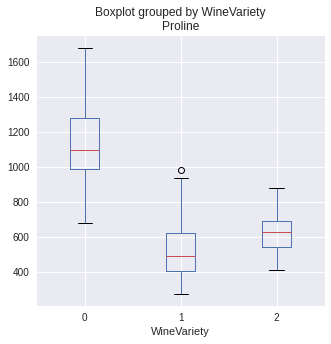

In [9]:
for i in features:
    df.boxplot(column=i,by=label,figsize=(5,5))

In [ ]:
X, y = data[features].values, data[label].values